<a href="https://colab.research.google.com/github/danishlaraib0/studyoflogisticmap/blob/main/logistic_maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bifurcation Diagram

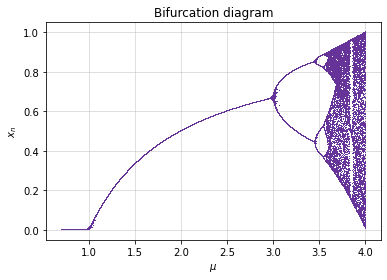

In [ ]:
import matplotlib.pyplot as plt
import numpy as np





## BIFURCATION DIAGRAM





mu = np.linspace(0.7,4,100000)
Y = []



for k in mu:
    u = np.random.random()
    for n in range(101):
      u=(k*u)*(1-u)
    Y.append(u)



## Data plot

plt.plot(mu, Y, ls='', marker=',', color = "rebeccapurple")

plt.xlabel("$\mu$")
plt.ylabel("$x_n$")
plt.title("Bifurcation diagram")
plt.grid(alpha = 0.5)

plt.show()


Stair case graph

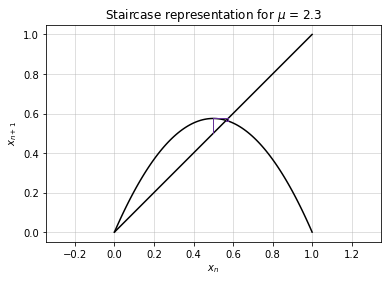

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sys 





## CALCULATION OF THE TERMS OF THE LOGISTICS APPLICATION





## System constants

mu = 2.3                                                 # Rate of growth
n = 30                                                   # Number of iterations




## System initial conditions

N = np.arange(0, n, 1)                                        # Creation of the list containing the number of iterations to perform
x0 = 0.5                                                      



## Function that returns a list whose elements are the terms of the sequence

def applicationLogistique(x0, N, mu):
    # Checking the value of the growth rate and the initial value of x
    # Creation of the table containing the terms of the sequence
    X = np.zeros(N)
    # Sequence initialization
    X[0] = x0
    # Calculation of the terms of the sequence
    for k in range(1, N):
        X[k] = mu*X[k-1]*(1-X[k-1])
    return X



def dessiner(mu,u0,n):
    # Plot of f(x) = mu * x * (1-x)
    X = np.linspace(0,1,100)
    Y = mu*X*(1-X)
    plt.plot(X,Y, color = "black")
    
    # Plot of y=x
    plt.plot(X, X, color = "black")
    
    # Trace of the sequence
    U = applicationLogistique(u0,n,mu)
    for i in range(n-1):
        # Plot of the vertical line joining (u_i;u_i) to (u_i, u_(i+1))
        plt.plot([U[i],U[i]],[U[i],U[i+1]],"r",linewidth=1, color = "rebeccapurple")
        # Plot of the horizontal line joining (u_i;u_(i+1)) to (u_(i+1); u_(i+1))
        plt.plot([U[i],U[i+1]],[U[i+1],U[i+1]] ,"r",linewidth=1, color= "rebeccapurple")

    plt.xlabel("$x_n$")
    plt.ylabel("$x_{n+1}$")
    plt.title("Staircase representation for $\mu$ = " + str(mu))
    plt.grid(alpha = 0.5)
    plt.axis("equal") # To have an orthonormal frame
    plt.show()


dessiner(mu, x0, n)




## Logistic map

Rate of growth (between 0 and 4) : 3.5
Initial value of x (between 0 and 1) : 0.2


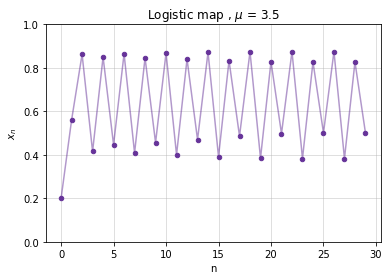

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sys 





## CALCULATION OF THE TERMS OF THE LOGISTICS APPLICATION





## System constants

mu = float(input("Rate of growth (between 0 and 4) : "))   # Rate of growth
nbi = 30                                                    # Number of iterations



## System initial conditions

N = np.arange(0, nbi, 1)                                        # Creation of the list containing the number of iterations to perform
x0 = float(input("Initial value of x (between 0 and 1) : "))     # Initial value of x



## Function that returns a list whose elements are the terms of the sequence

def applicationLogistique(x0, N, mu):
    # Checking the value of the growth rate and the initial value of x
    if (mu < 0 or mu > 4) or (x0 < 0 and x0 > 1):
        print("Error: growth rate must be between 0 and 4 and the initial value of x must be between 0 and 1.")
        sys.exit()
    # Creation of the table containing the terms of the sequence
    X = np.zeros([len(N)])
    # Sequence initialization
    X[0] = x0
    # Calculation of the terms of the sequence
    for k in range(1, len(N)):
        X[k] = mu*X[k-1]*(1-X[k-1])
    return X



## Data recovery

X = applicationLogistique(x0, N, mu)     # Creation of the list containing the terms of the list



## Data plot

plt.ylim(0,1)
plt.scatter(N, X, color = "rebeccapurple", s = 20, zorder = 3)
plt.plot(N, X,  color = "rebeccapurple", alpha = 0.5)

plt.xlabel("n")
plt.ylabel("$x_n$")
plt.title("Logistic map , $\mu$ = " + str(mu))
plt.grid(alpha = 0.5)

plt.show()


Mandelbrot set

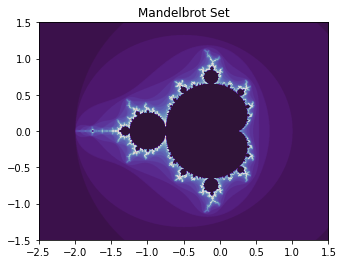

In [ ]:
import matplotlib.pyplot as plt
import numpy as np





## REPRESENTATION OF THE MANDELBROT SET





## Function that returns an integer proportional to the duration of the divergence of a point of the complex plane entered as a parameter

def pointMandelbrot(c) :
      # Recurrence initialization
      z = 0
      # Calculation of the duration of divergence of the point of the complex plane = Test of divergence for each term of the sequence.
      # If a term diverges then the loop stops and the function returns the number of iterations performed.
      # If no term diverges then the point is part of the Mandelbrot set and the function returns 0.
      for n in range(1, 50) :
            if abs(z) > 2 :
                  return n
            z = z**2 + c
      return 0



Rmin, Rmax = -2.5, 1.5              # Choice of zoom on the real axis (by default: -2.5, 1.5)
Imin, Imax = -1.5, 1.5              # Choice of zoom on the imaginary axis (by default: -1.5, 1.5)
nR = 1000                           # Number of steps on the real axis
nI = 1000                           # Number of steps on the imaginary axis
R = np.linspace(Rmin, Rmax, nR)     # Creation of the list of reals
I = np.linspace(Imin, Imax, nI)     # Creation of the list of imaginaries



## Function that returns an array having as elements the durations of divergence of each point of the complex plane

def ensembleMandelbrot(R, I) :
      # Creation of the table containing the durations of divergence
      D = np.zeros([len(R), len(I)])
      # Calculation of the durations of divergence for each point of the complex plane
      for i in range(len(R)) :
            for j in range(len(I)) :
                  D[i,j] = pointMandelbrot(complex(R[i], I[j]))
      return D



## Data recovery

D1 = ensembleMandelbrot(R, I)       # Creation of the data table
D2 = D1.T                           # Calculation of the transpose of the data table for reading the data. The element indexed by the indices m,n corresponds to the pixel of coordinates y,x



# Plot 2D

plt.imshow(D2, extent=[Rmin, Rmax, Imin, Imax], cmap = "twilight_shifted")
plt.title("Mandelbrot Set")
plt.show()


Julia Set 

Real part of the constant:-0.69
Imaginary part of the constant: 0.69


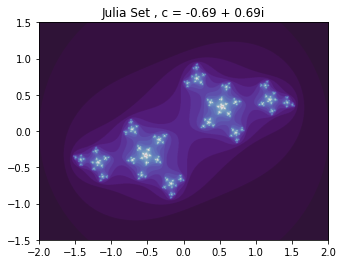

In [ ]:
import matplotlib.pyplot as plt
import numpy as np





## REPRESENTATION OF JULIA'S SET





## System constant

a = float(input("Real part of the constant:"))
b = float(input("Imaginary part of the constant: "))
c = complex(a, b)      # Value of the complex constant



## Function that returns an integer proportional to the duration of the divergence of a point of the complex plane entered as a parameter

def pointJulia(z, c) :
      # Calculation of the duration of divergence of the point of the complex plane = Test of divergence for each term of the sequence.
      # If a term diverges then the loop stops and the function returns the number of iterations performed. If no term diverges then the point is part of the Mandelbrot set and the function returns 0.
      for n in range(1, 200) : # The number of iterations increases the precision
            if abs(z) > 2 :
                  return n
            z = z**2 + c
      return 0



Rmin, Rmax = -2.0, 2.0              # Choice of zoom on the real axis (by default: -2.0, 2.0)
Imin, Imax = -1.5, 1.5              # Choice of zoom on the imaginary axis (by default: -1.5, 1.5)
nR = 1000                           # Number of steps on the real axis
nI = 1000                           # Number of steps on the imaginary axis
R = np.linspace(Rmin, Rmax, nR)     # Creation of the list of reals
I = np.linspace(Imin, Imax, nI)     # Creation of the list of imaginaries



## Function that returns an array having as elements the durations of divergence of each point of the complex plane

def ensembleJulia(R, I, c) :
      # Creation of the table containing the durations of divergence
      D = np.zeros([len(R), len(I)])
      # Calculation of the durations of divergence for each point of the complex plane
      for i in range(len(R)) :
            for j in range(len(I)):
                  D[i,j] = pointJulia(complex(R[i], I[j]), c)
      return D



## Data recovery

D1 = ensembleJulia(R, I, c)   # Creation of the data table
D2 = D1.T                     # Calculation of the transpose of the data table for reading the data. The element indexed by the indices m,n corresponds to the pixel of coordinates y,x


# Plot 2D

plt.imshow(D2, extent=[Rmin, Rmax, Imin, Imax], cmap = "twilight_shifted")
plt.title("Julia Set , c = " + str(a) + " + " + str(b) + "i")
plt.show()
